<a href="https://colab.research.google.com/github/indiatoryy/Coding-Projects/blob/main/A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 2 - Binary Linear Classification vs SVM**

**India Tory**

**October 20, 2022**



Problem 0: Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

x = iris.data[0:100]
y = iris.target[0:100]
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.80, random_state=0)

*Problem 1: (2 points) Implement a binary linear classifier on the first two dimensions (sepal length and width) of the iris dataset and plot its decision boundary. (Hint: sklearn refers to the binary linear classifier as a LogisticRegression, we will see why later in the course.)*

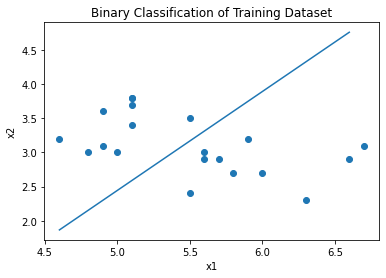

In [ ]:
from sklearn.linear_model import LogisticRegression

binaryClass = LogisticRegression(random_state=0)
binaryClass.fit(xTrain[:,:2], yTrain)

# model parameters
w1, w2 = binaryClass.coef_[0].T
b = binaryClass.intercept_[0]

# y = mx + c
# given: 0 = w1*x + w2*y + b --> y = (-w1*x - b)/w2
m = (-w1/w2)
c = (-b/w2)
decision_bounds = [m, c]

# plot training
tests1 = np.arange(min(xTrain[:,0]),max(xTrain[:,0]))
plt.plot(tests1, (m*tests1 + c))
plt.scatter(xTrain[:,0],xTrain[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification of Training Dataset")

plt.show()


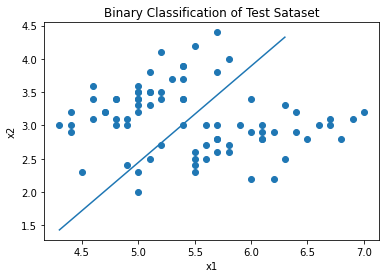

In [ ]:
# plot test
tests2 = np.arange(min(xTest[:,0]),max(xTest[:,0]))
plt.plot(tests2, (m*tests2 + c))
plt.scatter(xTest[:,0],xTest[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Binary Classification of Test Sataset")

plt.show()

*2. (1 point) Report the accuracy of your binary linear classifier on both the training and test sets.*

In [ ]:
trainingAccuracy = binaryClass.score(xTrain[:,:2], yTrain)*100
print ("Accuracy of binary classifier on training set: ", trainingAccuracy)

testAccuracy = binaryClass.score(xTest[:,:2], yTest)*100
print ("Accuracy of binary classifier on test set: ", testAccuracy)

Accuracy of binary classifier on training set:  100.0
Accuracy of binary classifier on test set:  98.75


*3. (2 points) Implement a linear SVM classifier on the first two dimensions (sepal length and width). Plot the decision boundary of the classifier and its margins.*

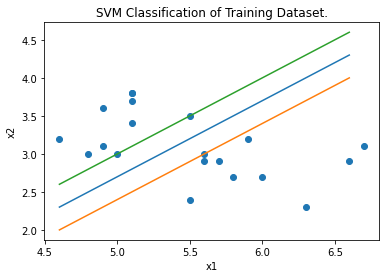

In [ ]:
from sklearn.svm import SVC
svm1 = SVC(C = 1000, kernel = "linear")
svm1.fit(xTrain[:,:2], yTrain)

b = svm1.intercept_[0]
w1,w2 = svm1.coef_[0].T

# y = mx + c --> y = (-w1*x - b)/w2
m = (-w1/w2)
c = (-b/w2)
svm_decision_bounds = [m, c]

# positive: 1 = w1*x1 + w2*x2 + b
posC = (-b+1)/w2
# negative: -1 = w1*x1 + w2*x2 + b
negC = (-b-1)/w2

tests3 = np.arange(min(xTrain[:,0]),max(xTrain[:,0]))
plt.plot(tests3, (m*tests3 + c))
plt.plot(tests3, (m*tests3 + posC))
plt.plot(tests3, (m*tests3 + negC))
plt.scatter(xTrain[:,0],xTrain[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Classification of Training Dataset.")

plt.show()

*4. (1 point) Circle the support vectors. Please justify how to identify them through the duality theorem. (hint: KKT condition)*

See other submission for annotated graph and justification using the duality theorem.

*5. (1 point) Report the accuracy of your linear SVM classifier on both the training and test sets.*

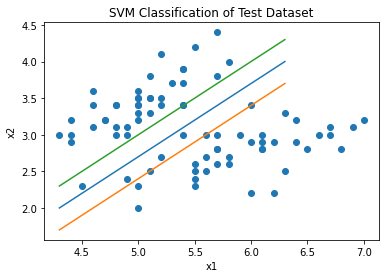

In [ ]:
# plotting test data
tests4 = np.arange(min(xTest[:,0]),max(xTest[:,0]))
plt.plot(tests4, (m*tests4 + c))
plt.plot(tests4, (m*tests4 + posC))
plt.plot(tests4, (m*tests4 + negC))
plt.scatter(xTest[:,0],xTest[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM Classification of Test Dataset")

plt.show()

In [ ]:
trainingAccuracySVM1 = svm1.score(xTrain[:,:2], yTrain)*100
print ("Accuracy of SVM on training set:", trainingAccuracySVM1)


testAccuracySVM1 = svm1.score(xTest[:,:2], yTest)*100
print ("Accuracy of SVM on test set:", testAccuracySVM1)

Accuracy of SVM on training set: 100.0
Accuracy of SVM on test set: 100.0


*6. (1 point) What is the value of the margin? Justify your answer.*

In [ ]:
# Justification: learned in asynchronous lecture (#11) that margin is (2 * 1/||w||)
# margin = 2 / ||w|| = 2 / (sqrt(w1*w1 + w2*w2))

margin = 2 / np.sqrt((w1**2 + w2**2))
print("Margin value: ", margin)

Margin value:  0.42430075463962574


*7. (1 point) Which vector is orthogonal to the decision boundary?*

The equation of the decision boundary is: 0 = w1x1 + w2x2 + b

As a result, we know that the orthogonal (or normal) vector from this equation is [w1 w2]T.

[w1 w2]T is the weight vector, therefore the **weight vector** is orthogonal to the decision boundary.

*8. (3 points) Split the iris dataset again in a training and test set, this time setting test size to 0.4 when calling train test split. Train the SVM classifier again. Does the decision boundary change? How about the test accuracy? Please justify why (hint: think about the support vectors), and illustrate your argument with a new plot.*

In [ ]:
# re-splitting the data
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x, y, test_size=0.40, random_state=0)

# re-train the SVM
svm2 = SVC(C = 1000, kernel = "linear")
svm2.fit(xTrain2[:,:2], yTrain2)

# model parameters
b = svm2.intercept_[0]
w1,w2 = svm2.coef_[0].T

# decision boundary:
# y = mx + c --> y = (-w1*x - b)/w2
m = (-w1/w2)
c = (-b/w2)
svm_decision_bounds_2 = [m, c]

posC = (-b+1)/w2
negC = (-b-1)/w2


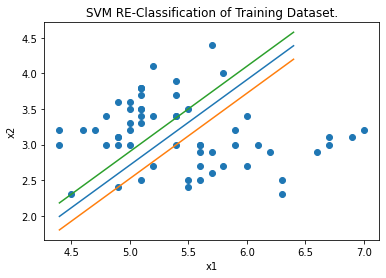

In [ ]:
# choosing Xs for boundary
tests5 = np.arange(min(xTrain2[:,0]),max(xTrain2[:,0]))

# plotting training data
plt.plot(tests5, (m*tests5 + c))
plt.plot(tests5, (m*tests5 + posC))
plt.plot(tests5, (m*tests5 + negC))
plt.scatter(xTrain2[:,0],xTrain2[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM RE-Classification of Training Dataset.")

plt.show()

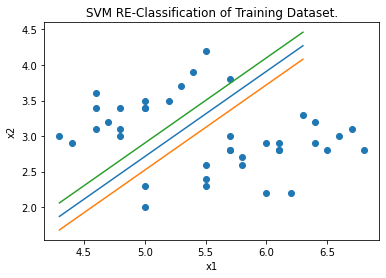

In [ ]:
# choosing Xs for boundary
tests6 = np.arange(min(xTest2[:,0]),max(xTest2[:,0]))

# plotting test dataset
plt.plot(tests6, (m*tests6 + c))
plt.plot(tests6, (m*tests6 + posC))
plt.plot(tests6, (m*tests6 + negC))
plt.scatter(xTest2[:,0],xTest2[:,1])

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("SVM RE-Classification of Training Dataset.")

plt.show()

In [ ]:
# accuracy
trainingAccuracySVM2 = svm2.score(xTrain2[:,:2], yTrain2)*100
print ("Accuracy of SVM 2 on training set:", trainingAccuracySVM2)


testAccuracySVM2 = svm2.score(xTest2[:,:2], yTest2)*100
print ("Accuracy of SVM 2 on test set:", testAccuracySVM2)

Accuracy of SVM 2 on training set: 100.0
Accuracy of SVM 2 on test set: 100.0


In [ ]:
# SVM 1 boundary equation
# y = gx + l
g = svm_decision_bounds[0]
l = svm_decision_bounds[1]
print("SVM1 decision boundary equation: y = ", round(g,4), "x +", round(l,4))

# SVM 2 boundary equation
# y = ax + v
a = svm_decision_bounds_2[0]
v = svm_decision_bounds_2[1]
print("SVM2 decision boundary equation: y = ", round(a,4), "x +", round(v,4))

SVM1 decision boundary equation: y =  0.9998 x + -2.2988
SVM2 decision boundary equation: y =  1.2 x + -3.29


Yes, the decision boundary changes. The slope of the boundary for SVM2 is steeper (while still positive) and the y-intercept is more negative.

SVM 1 was trained using 20% of the data and tested using the remaining 80%. As a result, the weights and bias were not as well suited to the entire dataset. This means that there is a higher potential of incorrectly selecting support vectors and therefore having a less accurate model.

SVM 2 was trained using 60% of the data and tested using the remaining 40%. Since the model was trained using over half of the dataset, the weights and bias of the boundary were more "generalized" towards the dataset as a whole. As a result, the model is more accurate when the cost parameter is much lower (1). This is also because there is a larger pool of numbers to choose the support vectors from.

*9. (1 point) Do the binary linear classifier and SVM have the same decision boundaries?*

In [ ]:
# SVM 1 boundary equation
# y = gx + l
g = svm_decision_bounds[0]
l = svm_decision_bounds[1]
print("SVM1 decision boundary equation: y = ", round(g,4), "x +", round(l,4))

# SVM 2 boundary equation
# y = ax + v
a = svm_decision_bounds_2[0]
v = svm_decision_bounds_2[1]
print("SVM2 decision boundary equation: y = ", round(a,4), "x +", round(v,4))

# BC boundary equation
a = decision_bounds[0]
v = decision_bounds[1]
print("BC decision boundary equation: y = ", round(a,4), "x +", round(v,4))

SVM1 decision boundary equation: y =  0.9998 x + -2.2988
SVM2 decision boundary equation: y =  1.2 x + -3.29
BC decision boundary equation: y =  1.4477 x + -4.7943


The binary linear classifier and SVM do NOT have the same decision boundaries.

*10. (3 points) Now consider all 150 entries in the iris dataset, and retrain the SVM. You
should find that the data points are not linearly separable. How can you deal with it?
Justify your answer and plot the decision boundary of your new proposed classifier.*

In order to figure out how to deal with the data, we will plot it

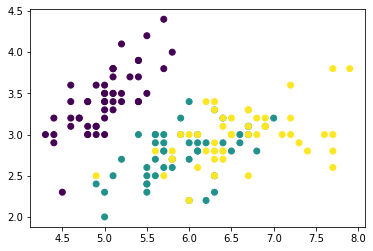

In [ ]:
x = iris.data[:,:2]
y = iris.target
plt.scatter(x[:,0],x[:,1], c=y)

Analysing this scatter plot, we can see three linearly separable classes. As a result, I will propose a new model which will separate the data into three linearly classifiable datasets (rather than just two like we did above). I am choosing this method because it maintins the linear aspect that we have been analyzing during this assignment, while also being better suited to the data.

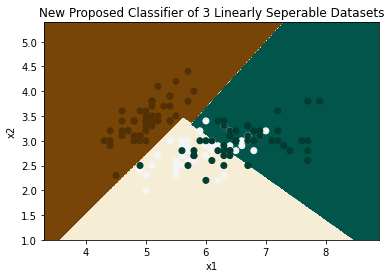

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.40, random_state=0)

newModel = SVC(kernel = 'linear', C=1000)
newModel.fit(xTrain, yTrain)

# need multiple data limits
min1, max1 = min(x[:,0])-1, max(x[:,0])+1
min2, max2 = min(x[:,1])-1, max(x[:,1])+1

#choose range of values of x1 and x2 for which to evaluate the decision boundary equation.
inc = .01
#use meshgrid here to account for the multiple dimensions
xs, ys = np.meshgrid(np.arange(min1, max1, inc), np.arange(min2, max2, inc))

# plot of the figure
# use np.c_ to translate slice objects to concatenation along the second axis.
# ravel returns a contiguous flattened array.
h = newModel.predict(np.c_[xs.ravel(), ys.ravel()])
h = h.reshape(xs.shape)
fig, ax = plt.subplots()
ax.contourf(xs, ys, h, cmap=plt.cm.BrBG)
ax.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.BrBG)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('New Proposed Classifier of 3 Linearly Seperable Datasets')

plt.show()